In [28]:
import numpy as np
import matplotlib.pyplot as plt
from funciones import *

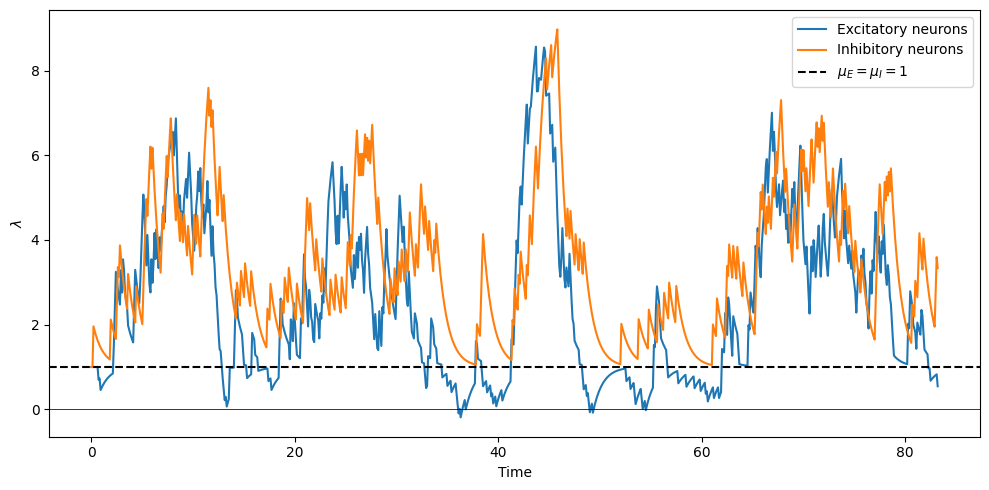

In [29]:
nmax = 10**3
N = 1000 # number of neurons
N_E = 800 # number of excitatory neurons
N_I = 200 # number of inhibitory neurons
g_E= 1.5/N # connection strength of excitatory neurons
g_I= 7.5/N # connection strength of inhibitory neurons
k = 1
mu_E = 1
mu_I = 1
tau = 1

# These parameters are similar to the ones used in Growing Critical: Self-Organized Criticality in a Developing Neural System Felipe Yaroslav Kalle Kossio
"""n_EE = 1.5*(4/5)**2
n_IE = 7.5*4/(5**2)
n_EI = 1.5*4/(5**2)
n_II = 7.5*1/(5**2)"""

n_EE = N*g_E*(N_E/N)*(N_E/N)*k
n_IE = N*g_I*(N_I/N)*(N_I/N)*k
n_EI = N*g_E*(N_E/N)*(N_E/N)*k
n_II = 0

dt = 0.1

time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)

fig = plt.figure(figsize=(10, 5))
plt.plot(time, rates_E, label='Excitatory neurons')
plt.plot(time, rates_I, label='Inhibitory neurons')
plt.xlabel('Time')
plt.axhline(1, label = '$\mu_E=\mu_I=1$', color = 'black', linestyle = '--')
plt.axhline(0, color = 'black',lw = 0.55)
plt.ylabel('$\lambda$')
plt.legend()
fig.tight_layout()


In [30]:
print(t_E[-10:])

[25.177346873578085, 25.218329846821277, 25.31189163387889, 25.33068690994923, 25.416370727153176, 25.437113032019507, 25.518876949150357, 25.53564839373393, 25.59918390596858, 25.634756759891605]


# Statistics

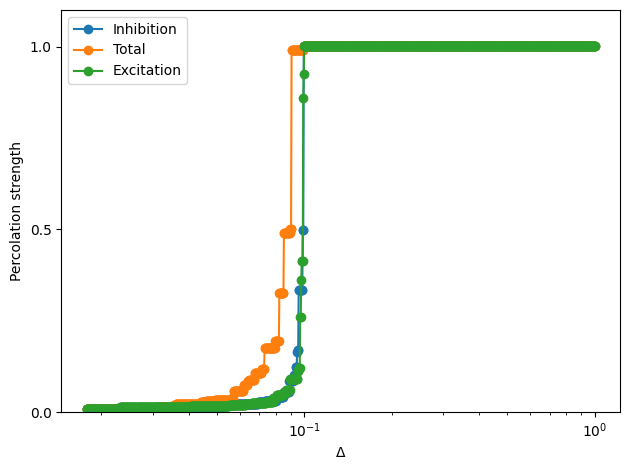

In [19]:
deltas = np.logspace(-1.75, 0, base= 10, num = 1000)
percolation_strength_exc = calculate_percolation_strength(np.diff(t_E), deltas)
percolation_strength_inh = calculate_percolation_strength(np.diff(t_I), deltas)
t = np.concatenate((t_E, t_I))
t = np.sort(t)
percolation_strength_tot = calculate_percolation_strength(np.diff(t), deltas)
plt.plot(deltas, percolation_strength_inh, marker = 'o', label = 'Inhibition')
plt.plot(deltas, percolation_strength_tot, marker = 'o', label = 'Total')
plt.plot(deltas, percolation_strength_exc, marker = 'o', label = 'Excitation')
plt.xscale('log')
plt.ylim(0, 1.1)
plt.yticks([0, 0.5, 1])
plt.xlabel('$\Delta$')
plt.ylabel('Percolation strength')
plt.legend()

plt.tight_layout()

C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


(array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.

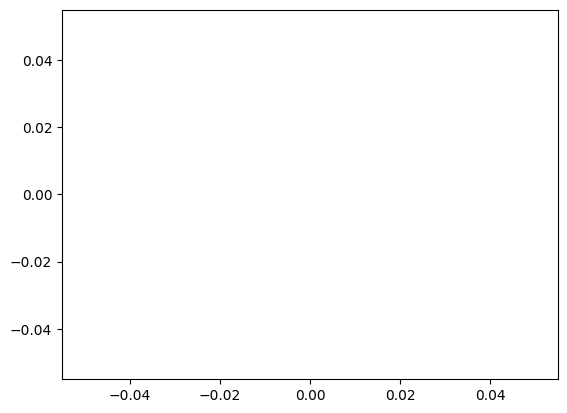

In [27]:
delta = 10**-1
clusters = identify_clusters(t_E, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]


plt.hist(cluster_sizes, bins = 100, density = True)